---
# <font color="DarkBlue"><b><center>Redes Neuronales</center></b></font>
---
## <font color="DarkGreen"><center>Tarea 4: Random Forest</font>

**Realizado por:** David Cevallos<br>
**Fecha:** 2023-07-27

**Enlace Google Colab:**
https://colab.research.google.com/drive/1TjaF2EfA5GJzp_5tPnFU9qOMSTCS9lks#scrollTo=KQs9zA4husbB

En la presente tarea analizaremos mediante Random Forests los datasets Computer Hardware, carsmall y Tratamiento Regresion para compararlos con los modelos de regresión logrados a través de un único árbol de decisión.

Para correr el presente notebook, procure cargar en la carpeta home los siguientes ficheros:



*   machine.data
*   carsmall.txt
*   TratamientoRegresion.xlsx




In [1]:
# Importación de librerías
import pandas as pd
import numpy as np
import sklearn.metrics as mt
from sklearn import tree
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

In [2]:
# Función para cálculo de MSE medio a través de árbol de regresión y Random Forest
# y estrategia K-folding
# Parámetros:
#   X                 Valores para predicción
#   Y                 Valores de regresión
#   k                 Número de folds
#   min_samples_leaf  Número mínimo de observaciones para una hoja
#   graph             Bandera que determina si mostrar diagrama de árbol de
#                     decisión o no
def calcularMSE(X, Y, k=10, min_samples_leaf=10, graph=False):
  kfold = KFold(n_splits=k, shuffle=True, random_state=0)
  total_mse = 0;
  total_mse_rf = 0;

  for i, (train_index, test_index) in enumerate(kfold.split(X)):
    print("----------------------------------------------------")
    print("Resultados para Fold Nro.",str(i+1))
    print("----------------------------------------------------")
    # Definición y entrenamiento de árbol de regresión
    modelo = tree.DecisionTreeRegressor(criterion="squared_error",
                                        random_state=0,
                                        min_samples_leaf=min_samples_leaf
                                        )
    modelo.fit(X[train_index,:], Y[train_index])
    # Obtención de valores predecidos para el fold (iteración)
    Ypred = modelo.predict(X[test_index,:])
    # Obtenemos el valor de MSE para el fold
    fold_mse = mt.mean_squared_error(Y[test_index], Ypred)
    print("Valor MSE (Decision Tree) = ", fold_mse)
    total_mse = total_mse + fold_mse;

    # Definición y entrenamiento de Random Forest
    modelo_rf = RandomForestRegressor(n_estimators=200, criterion="squared_error", random_state=0)
    modelo_rf.fit(X[train_index,:], Y[train_index])
    Ypred_rf = modelo_rf.predict(X[test_index,:])
    fold_mse_rf = mt.mean_squared_error(Y[test_index], Ypred_rf)
    print("Valor MSE (Random Forest) = ", fold_mse_rf)
    total_mse_rf = total_mse_rf + fold_mse_rf;

    # Presentar diagrama de valores reales vs predecidos
    plt.figure(figsize=(8,4))
    plt.scatter(np.arange(1,len(Y[test_index])+1), Y[test_index], c="blue", marker="o", label="Reales")
    plt.scatter(np.arange(1,len(Ypred)+1), Ypred, c="red", marker="*", label="Predecidos (Decision Tree)")
    plt.scatter(np.arange(1,len(Ypred_rf)+1), Ypred_rf, c="green", marker="*", label="Predecidos (Random Forest)")
    plt.title("Valores reales vs Valores predecidos (Test)")
    plt.legend(loc="best")
    plt.xticks(np.arange(1,len(Ypred)+1))
    plt.grid()
    plt.show()

    # Presentar diagrama de árbol de decisión
    if (graph):
      plt.figure(figsize=(15,8))
      tree.plot_tree(modelo, fontsize=7)
      plt.show()

  # Error Cuadrático Medio final
  mean_mse = total_mse/k;
  mean_mse_rf = total_mse_rf/k;
  print("--------------------------------------------------------------------")
  print("Error Cuadrático Medio final (Decision Tree): ", mean_mse);
  print("Error Cuadrático Medio final (Random Forest): ", mean_mse_rf);
  print("--------------------------------------------------------------------")

# Dataset Computer Hardware

----------------------------------------------
Ejercicio 1: Dataset Computer Hardware
----------------------------------------------
----------------------------------------------------
Resultados para Fold Nro. 1
----------------------------------------------------
Valor MSE (Decision Tree) =  3743.6531862307434
Valor MSE (Random Forest) =  2408.2837869047617


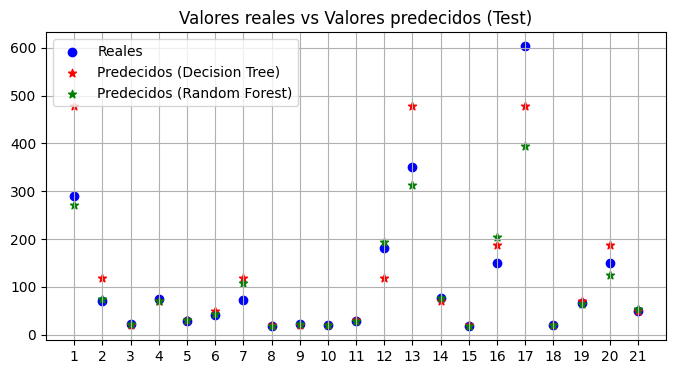

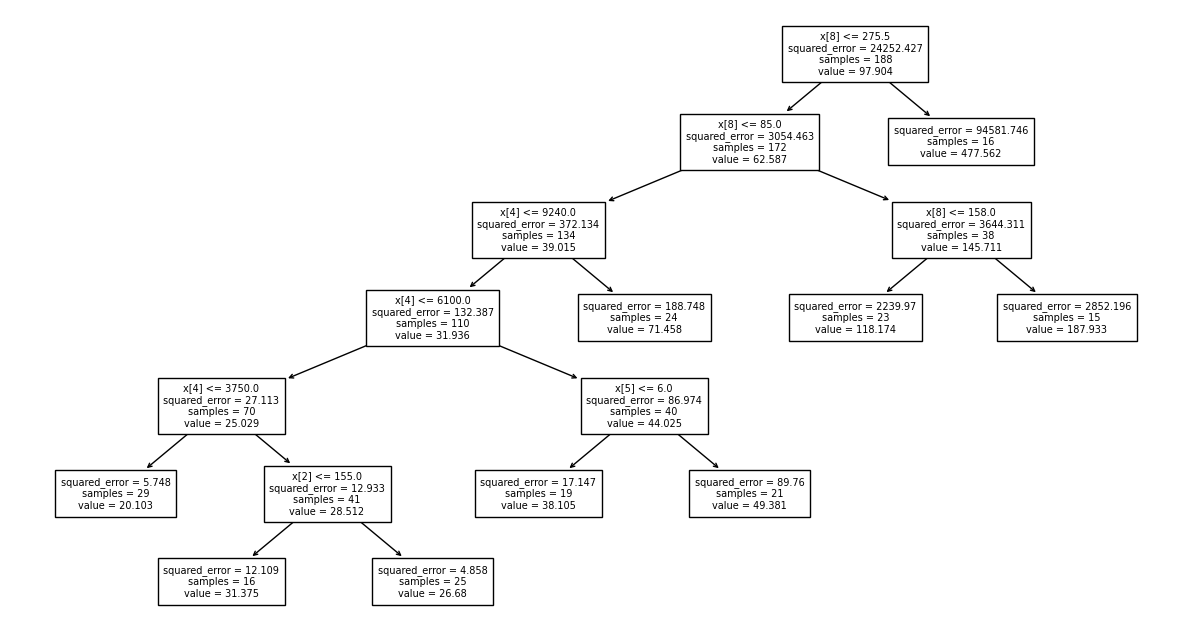

----------------------------------------------------
Resultados para Fold Nro. 2
----------------------------------------------------
Valor MSE (Decision Tree) =  1097.2532665391157
Valor MSE (Random Forest) =  1251.4945583333338


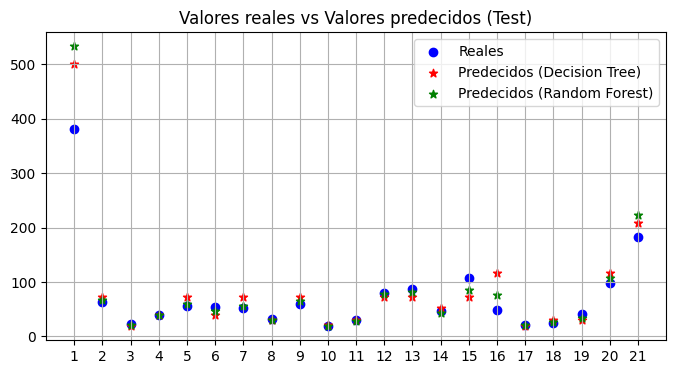

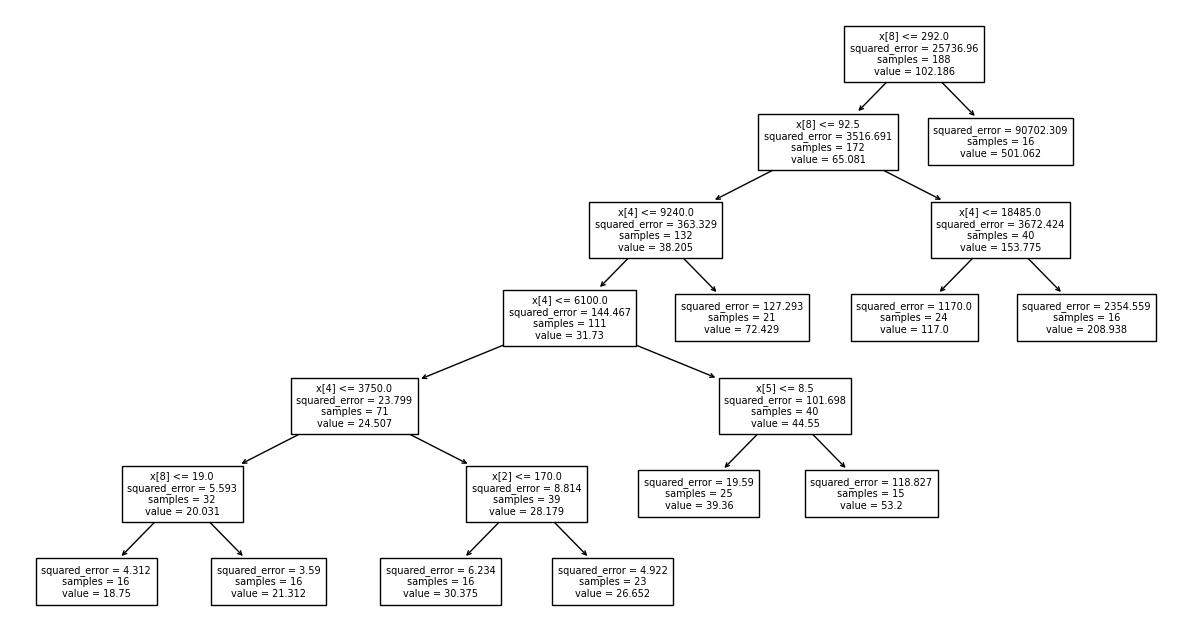

----------------------------------------------------
Resultados para Fold Nro. 3
----------------------------------------------------
Valor MSE (Decision Tree) =  4506.729184224842
Valor MSE (Random Forest) =  337.1677523809524


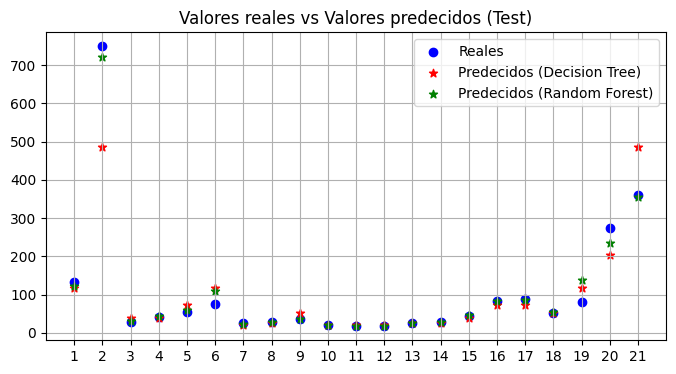

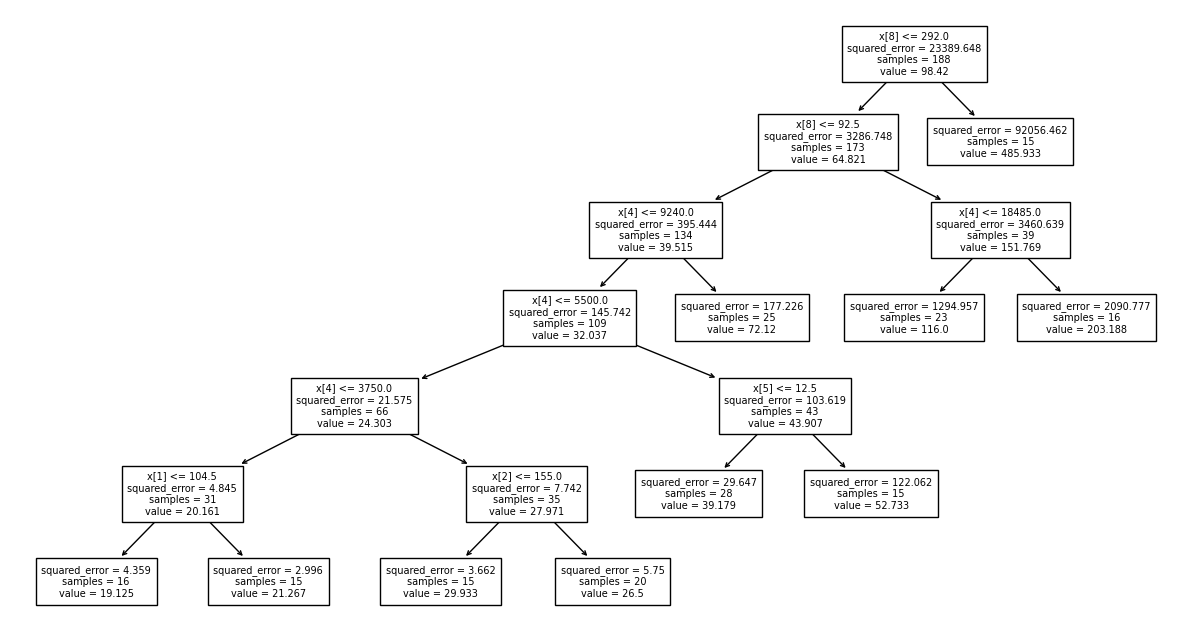

----------------------------------------------------
Resultados para Fold Nro. 4
----------------------------------------------------
Valor MSE (Decision Tree) =  622.9908761186232
Valor MSE (Random Forest) =  1273.7293666666665


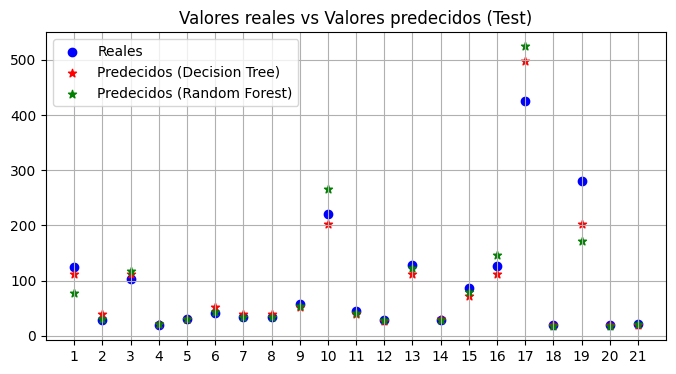

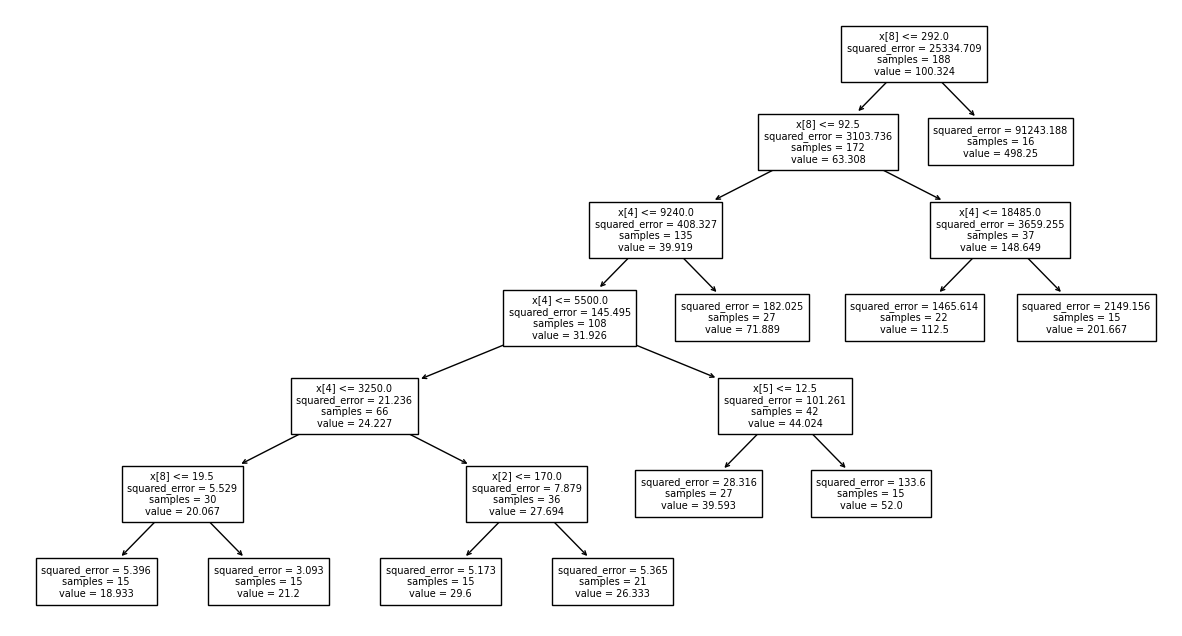

----------------------------------------------------
Resultados para Fold Nro. 5
----------------------------------------------------
Valor MSE (Decision Tree) =  227.72809329030065
Valor MSE (Random Forest) =  30.171400000000013


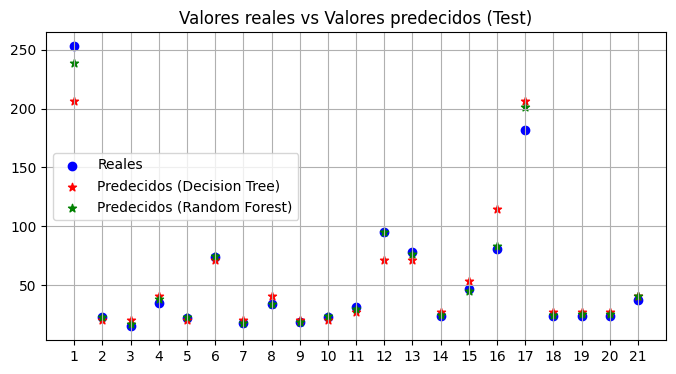

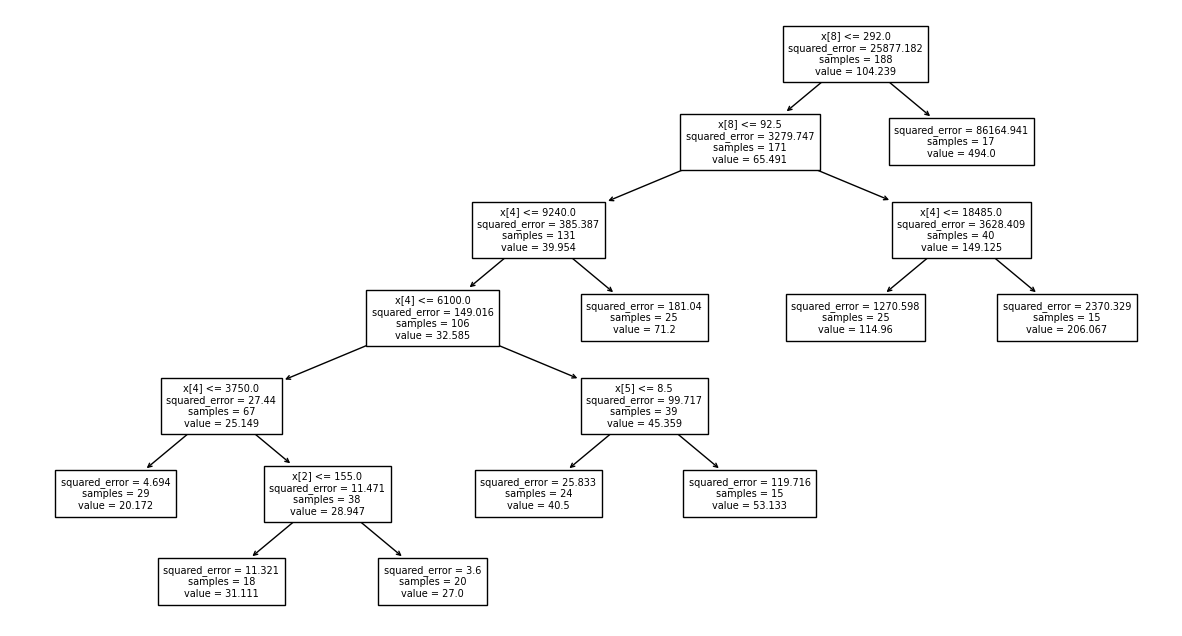

----------------------------------------------------
Resultados para Fold Nro. 6
----------------------------------------------------
Valor MSE (Decision Tree) =  15925.375730985706
Valor MSE (Random Forest) =  1215.9035773809524


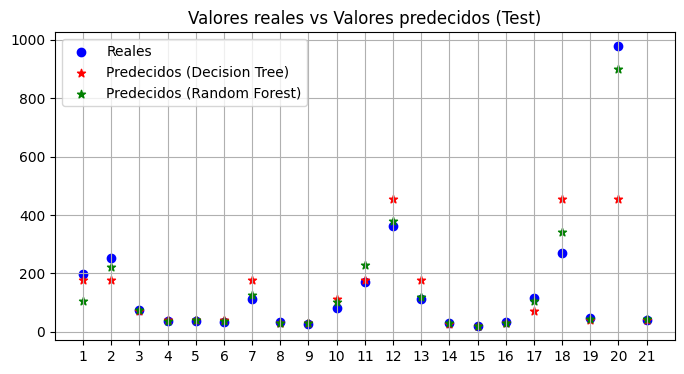

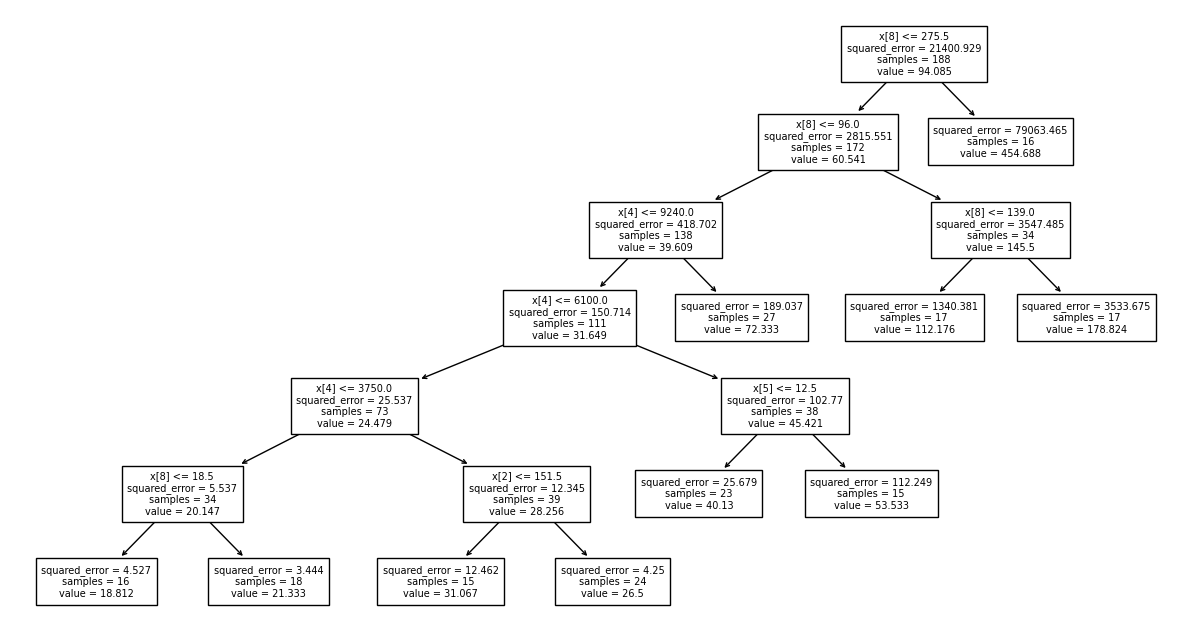

----------------------------------------------------
Resultados para Fold Nro. 7
----------------------------------------------------
Valor MSE (Decision Tree) =  4529.618153781838
Valor MSE (Random Forest) =  339.0683464285713


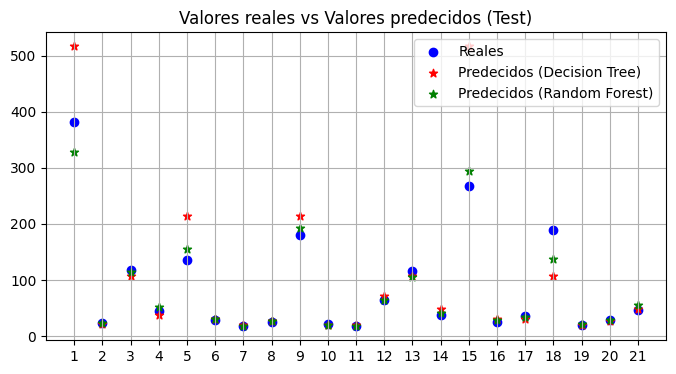

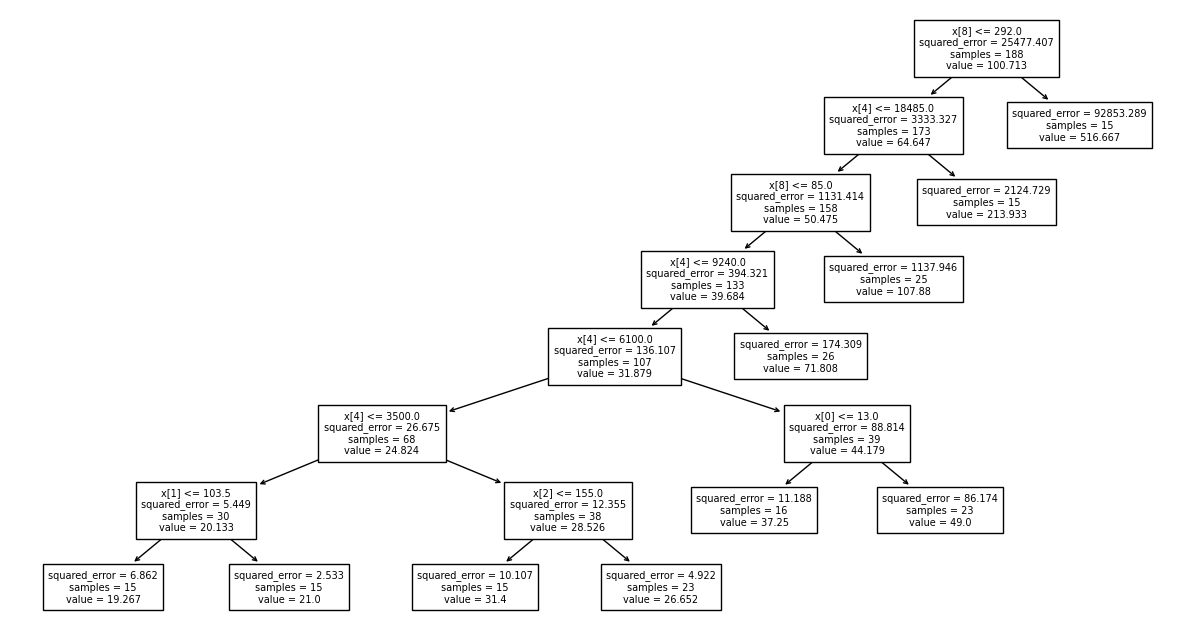

----------------------------------------------------
Resultados para Fold Nro. 8
----------------------------------------------------
Valor MSE (Decision Tree) =  9173.81939942673
Valor MSE (Random Forest) =  561.2059428571429


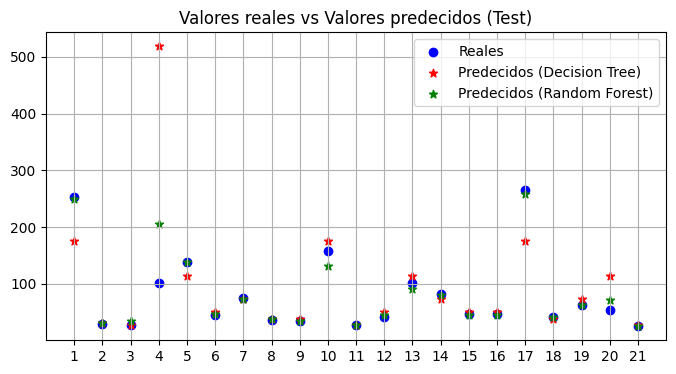

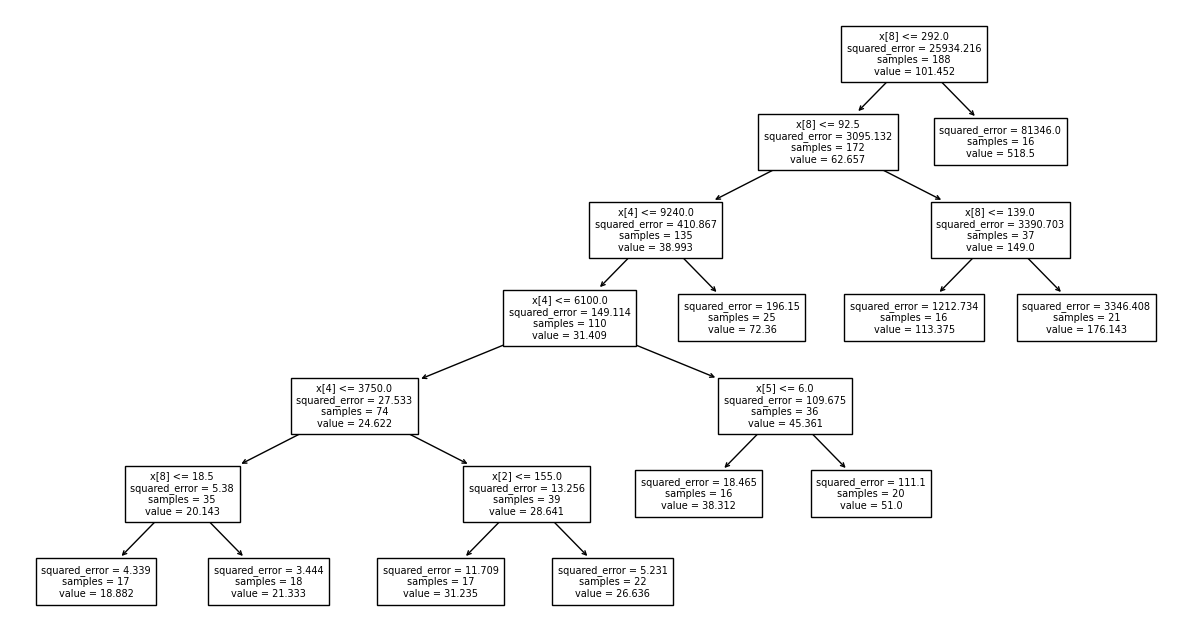

----------------------------------------------------
Resultados para Fold Nro. 9
----------------------------------------------------
Valor MSE (Decision Tree) =  394.35032104337864
Valor MSE (Random Forest) =  61.29945238095239


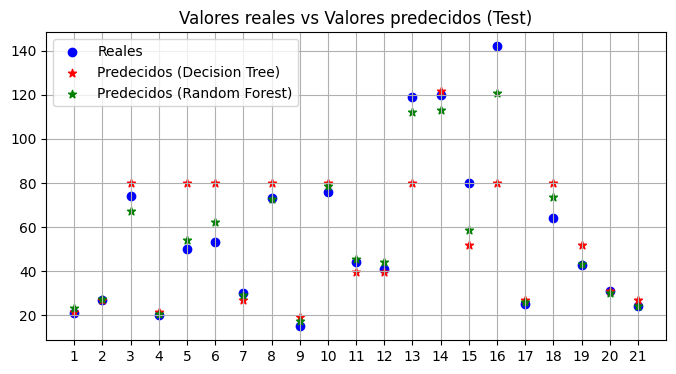

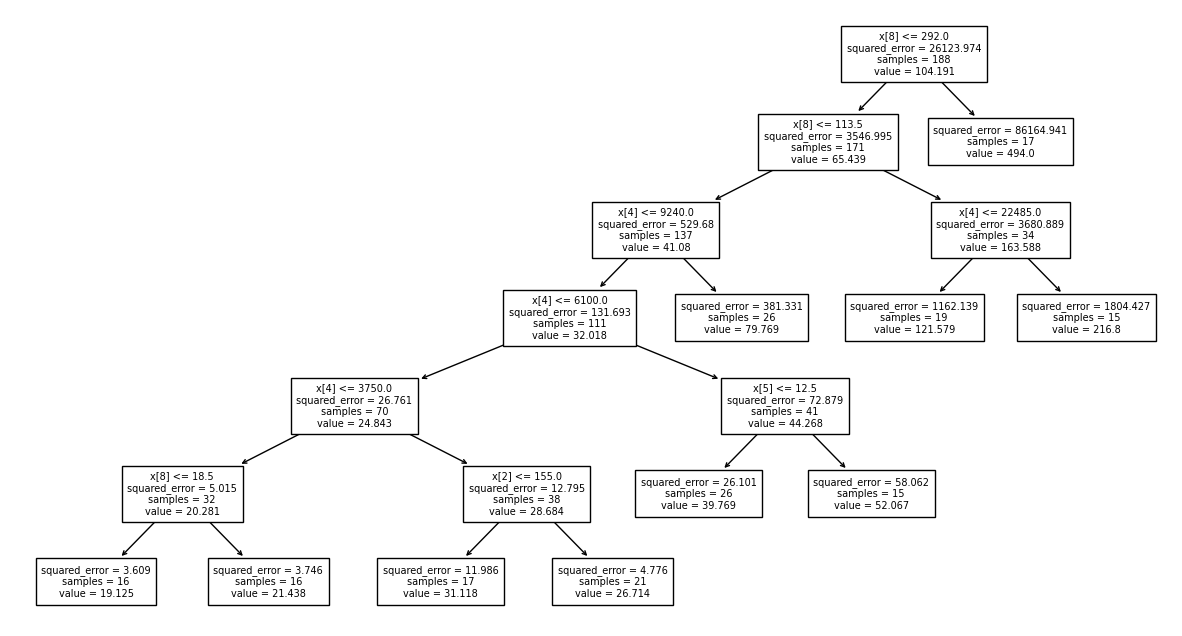

----------------------------------------------------
Resultados para Fold Nro. 10
----------------------------------------------------
Valor MSE (Decision Tree) =  57263.538602869085
Valor MSE (Random Forest) =  14610.891203750003


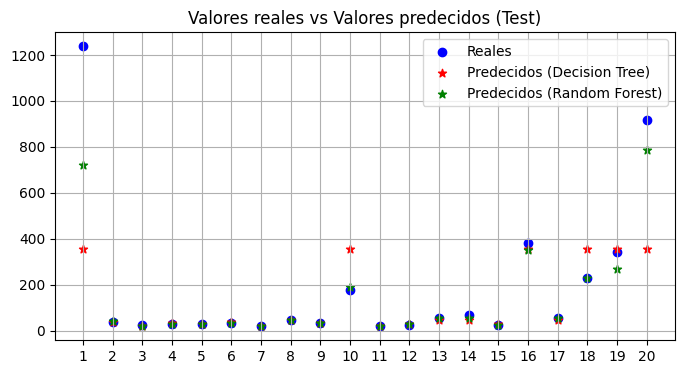

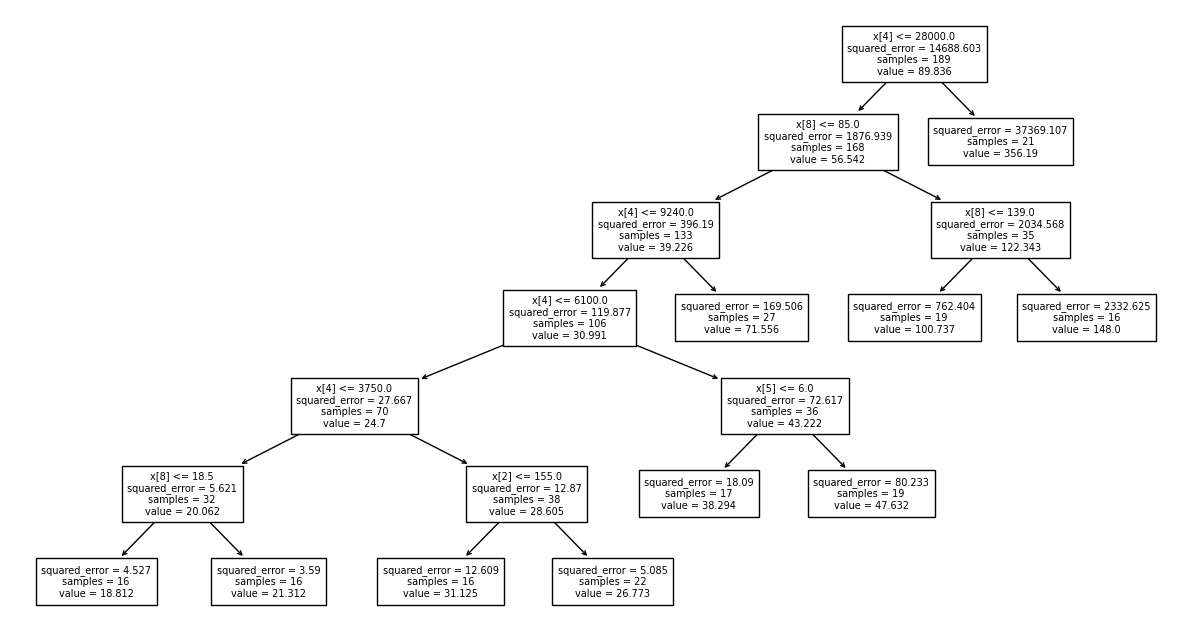

--------------------------------------------------------------------
Error Cuadrático Medio final (Decision Tree):  9748.505681451035
Error Cuadrático Medio final (Random Forest):  2208.9215387083336
--------------------------------------------------------------------


In [3]:
# Ejercicio 1: Dataset Computer Hardware
print("----------------------------------------------")
print("Ejercicio 1: Dataset Computer Hardware")
print("----------------------------------------------")

data = pd.read_csv("/home/machine.data", header=None)

data[0] = LabelEncoder().fit_transform(data[0])
data[1] = LabelEncoder().fit_transform(data[1])

X = data.drop(columns=[9]).to_numpy()
Y = data[9].to_numpy()

calcularMSE(X, Y, 10, 15, True)

# Dataset smallcar

----------------------------------------------
Ejercicio 2: Dataset carsmall
----------------------------------------------
----------------------------------------------------
Resultados para Fold Nro. 1
----------------------------------------------------
Valor MSE (Decision Tree) =  31.10575935533804
Valor MSE (Random Forest) =  19.882097100000003


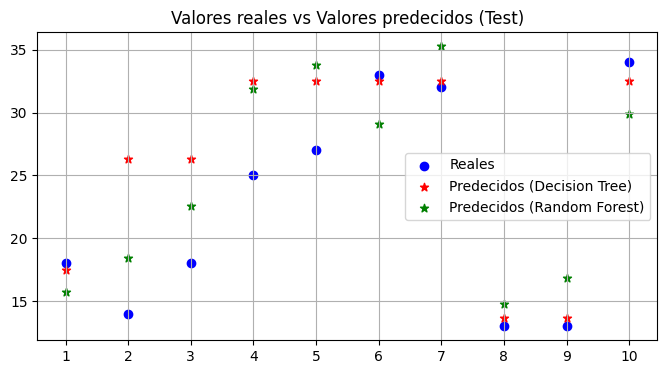

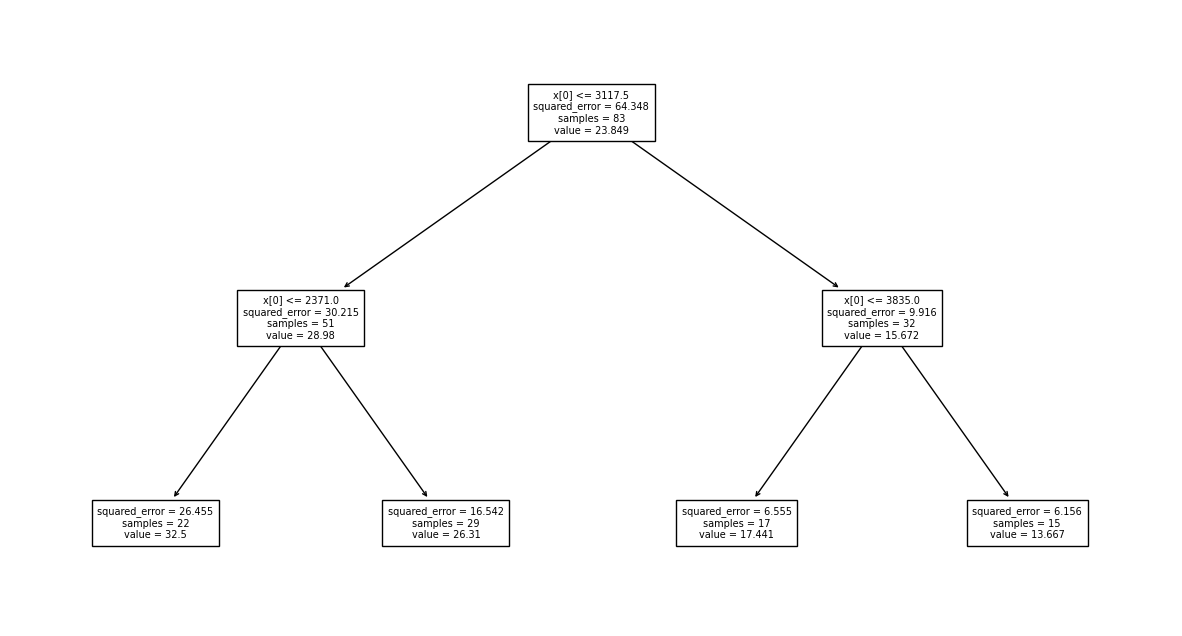

----------------------------------------------------
Resultados para Fold Nro. 2
----------------------------------------------------
Valor MSE (Decision Tree) =  21.621877291675567
Valor MSE (Random Forest) =  32.690751875000004


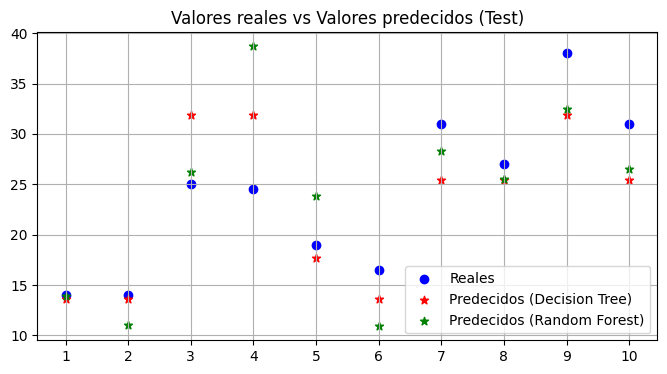

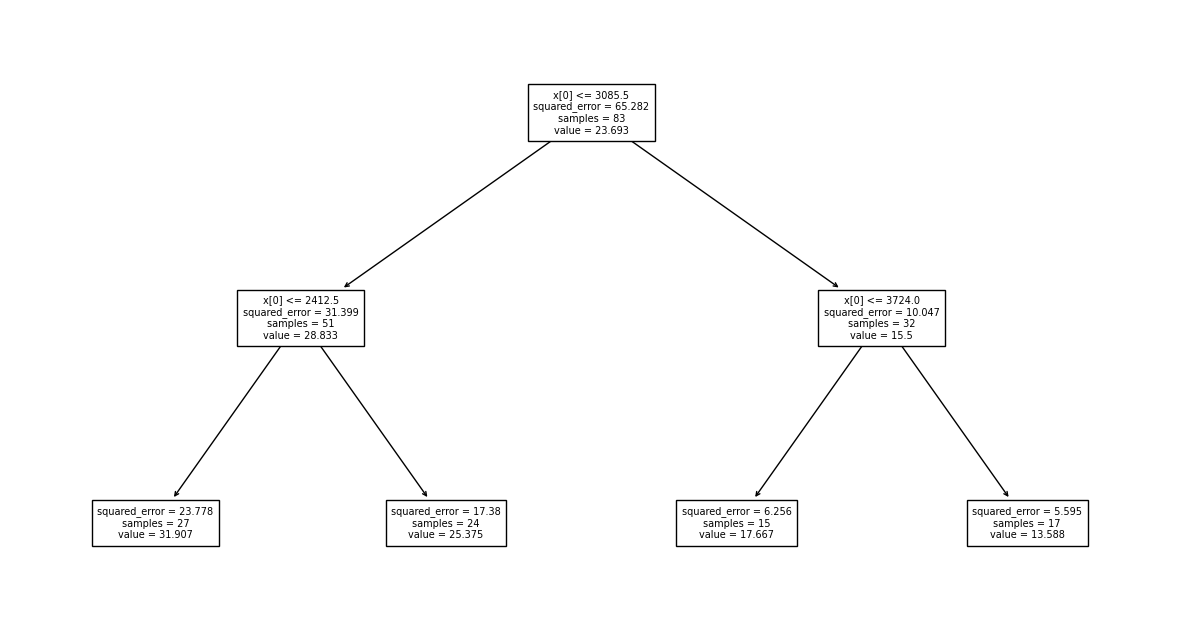

----------------------------------------------------
Resultados para Fold Nro. 3
----------------------------------------------------
Valor MSE (Decision Tree) =  46.159444444444446
Valor MSE (Random Forest) =  46.44602875


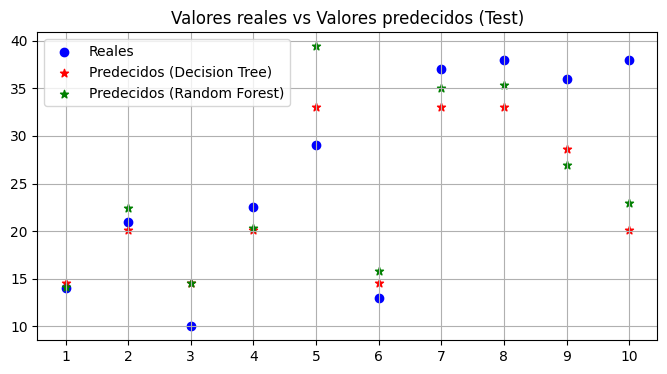

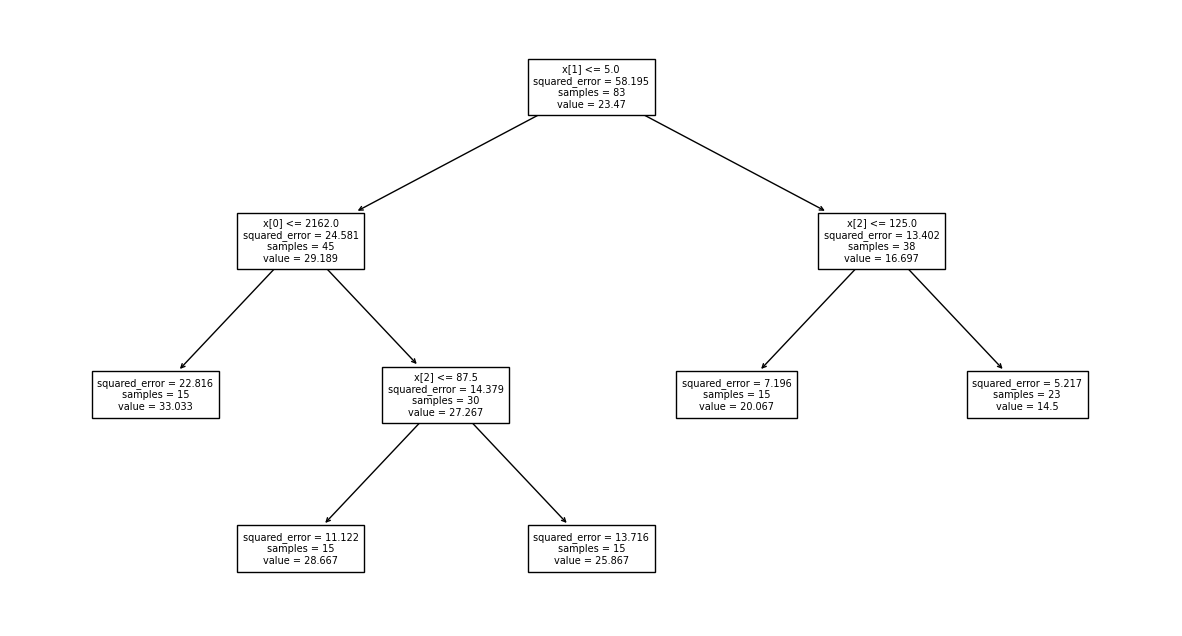

----------------------------------------------------
Resultados para Fold Nro. 4
----------------------------------------------------
Valor MSE (Decision Tree) =  23.240915798611113
Valor MSE (Random Forest) =  18.62379030555556


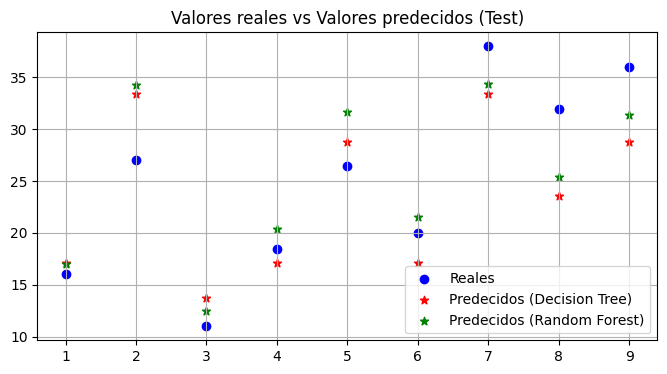

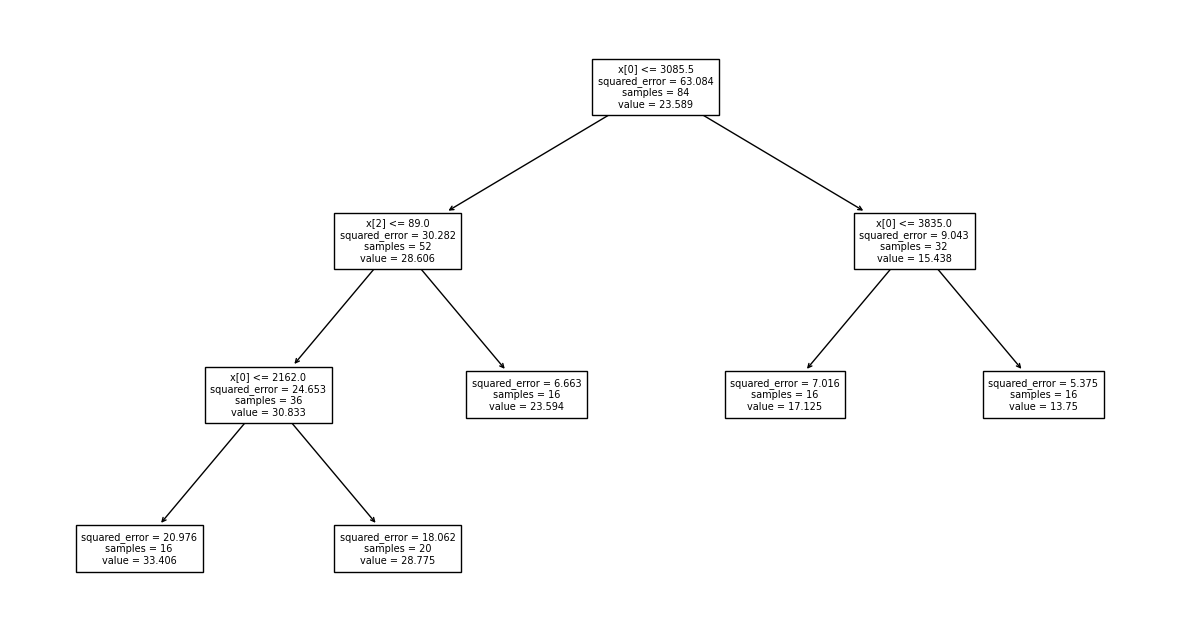

----------------------------------------------------
Resultados para Fold Nro. 5
----------------------------------------------------
Valor MSE (Decision Tree) =  22.29828469078263
Valor MSE (Random Forest) =  18.75129375


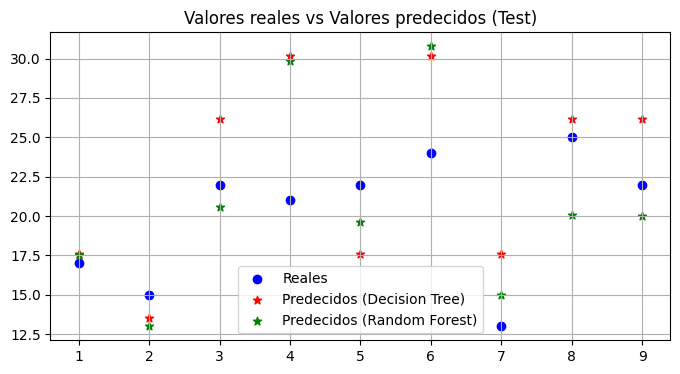

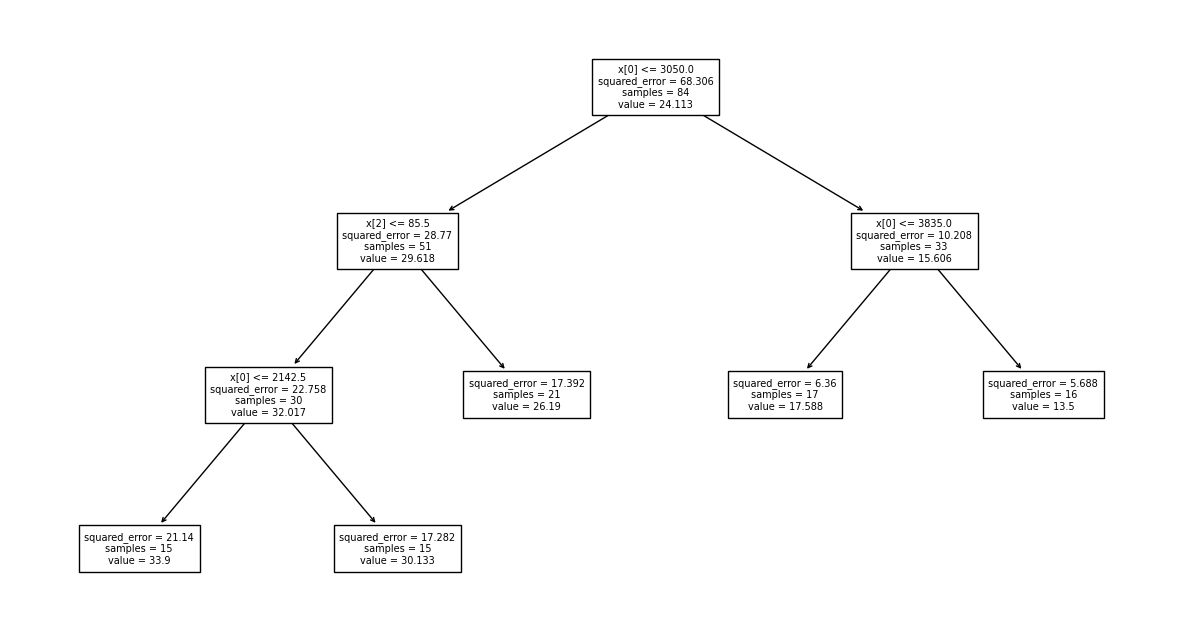

----------------------------------------------------
Resultados para Fold Nro. 6
----------------------------------------------------
Valor MSE (Decision Tree) =  17.42239442397875
Valor MSE (Random Forest) =  13.990760416666667


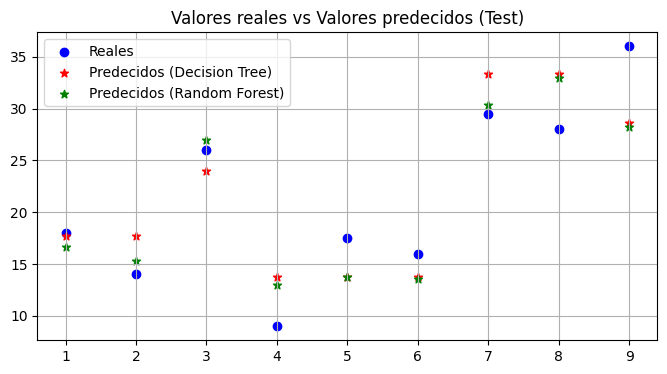

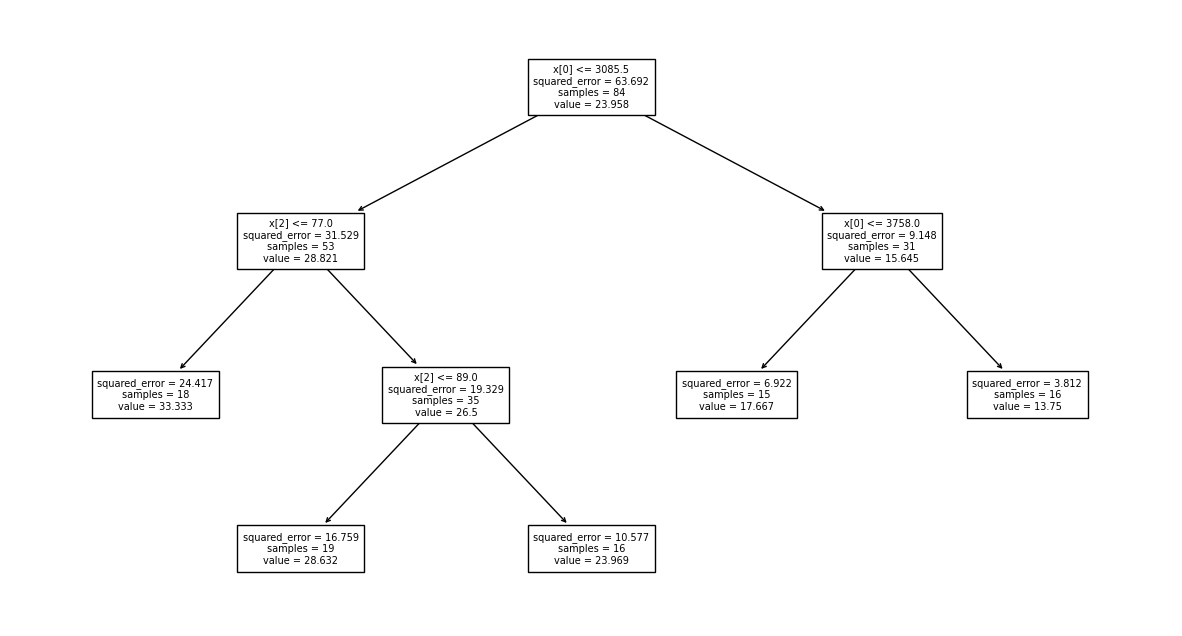

----------------------------------------------------
Resultados para Fold Nro. 7
----------------------------------------------------
Valor MSE (Decision Tree) =  19.243140849589278
Valor MSE (Random Forest) =  8.781895138888888


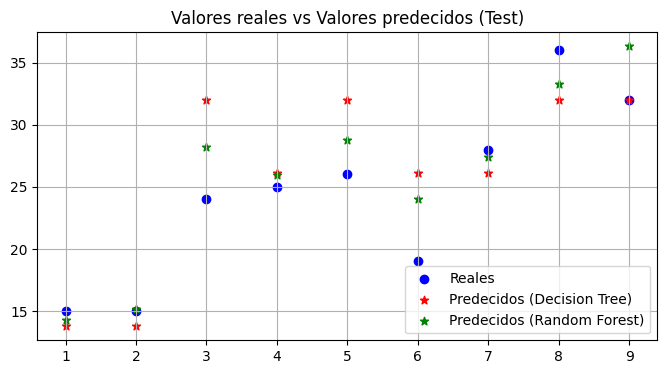

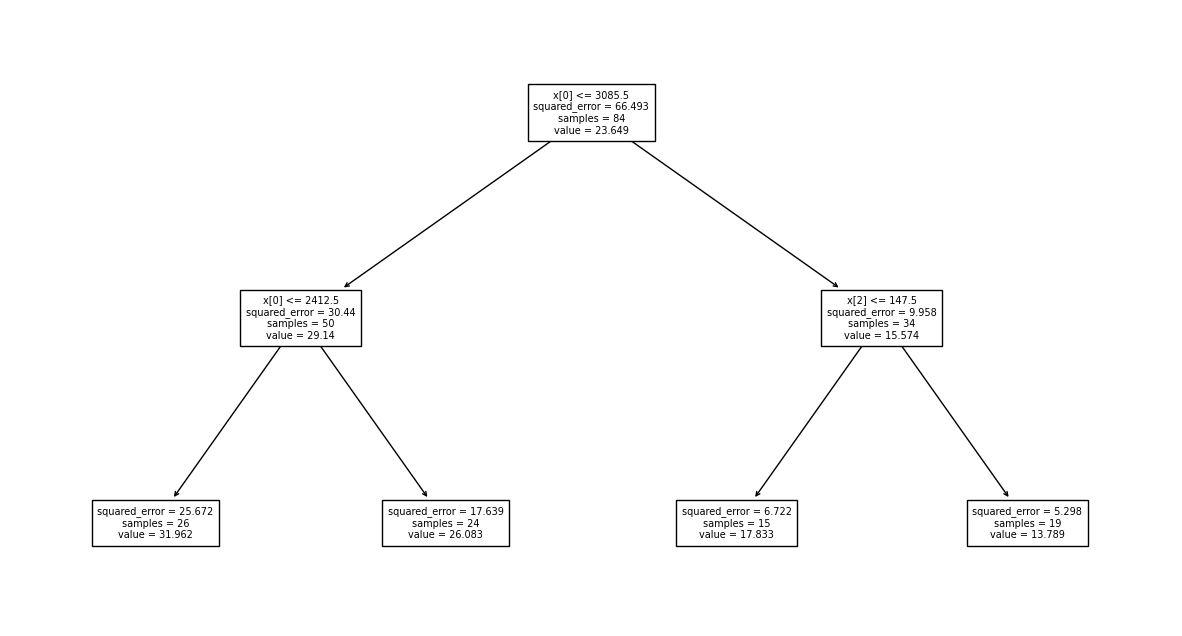

----------------------------------------------------
Resultados para Fold Nro. 8
----------------------------------------------------
Valor MSE (Decision Tree) =  11.544398735529066
Valor MSE (Random Forest) =  9.41409652777778


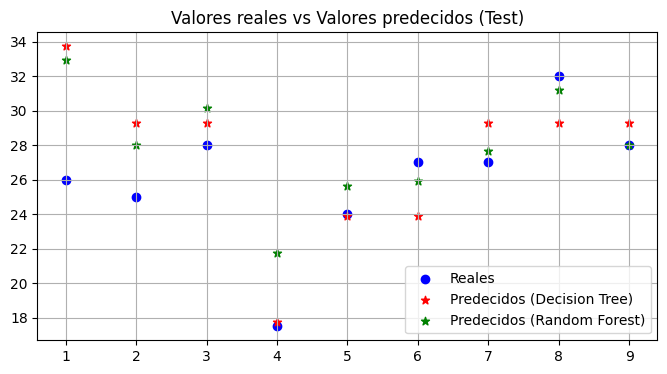

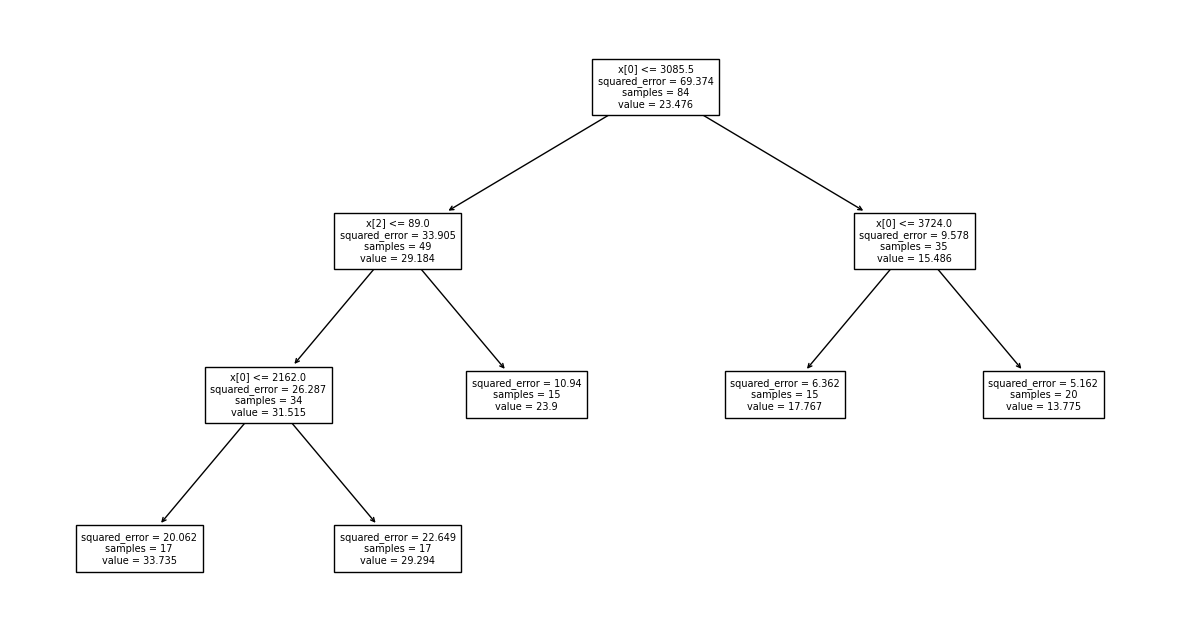

----------------------------------------------------
Resultados para Fold Nro. 9
----------------------------------------------------
Valor MSE (Decision Tree) =  16.151133289294055
Valor MSE (Random Forest) =  8.950795027777767


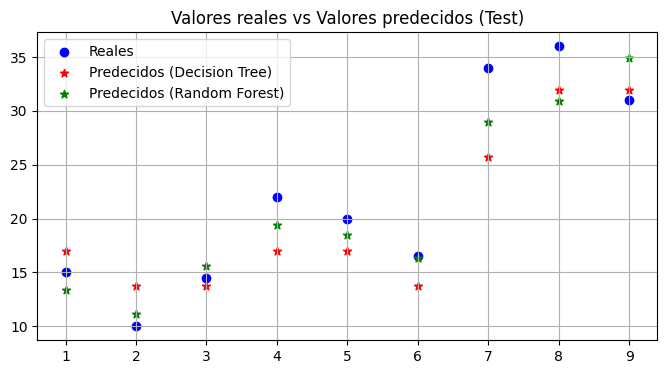

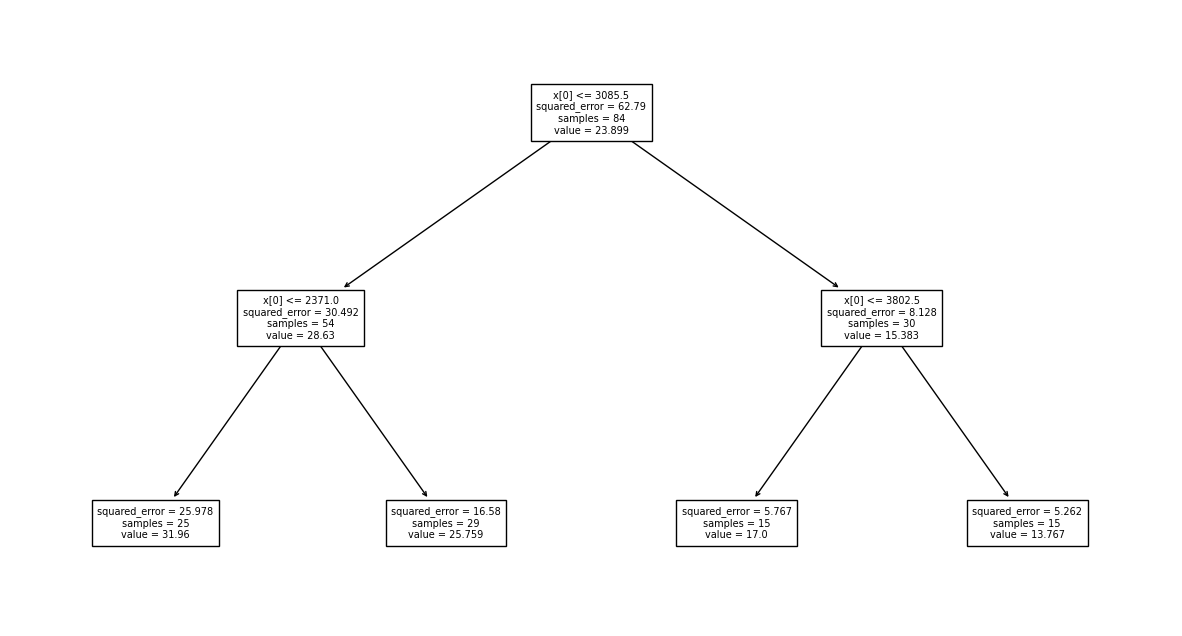

----------------------------------------------------
Resultados para Fold Nro. 10
----------------------------------------------------
Valor MSE (Decision Tree) =  16.939295374657068
Valor MSE (Random Forest) =  30.36392986111111


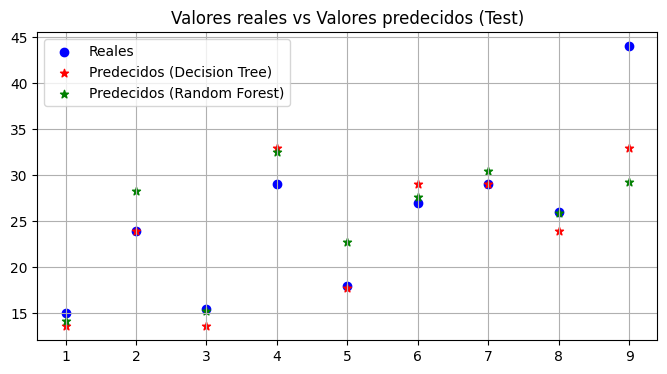

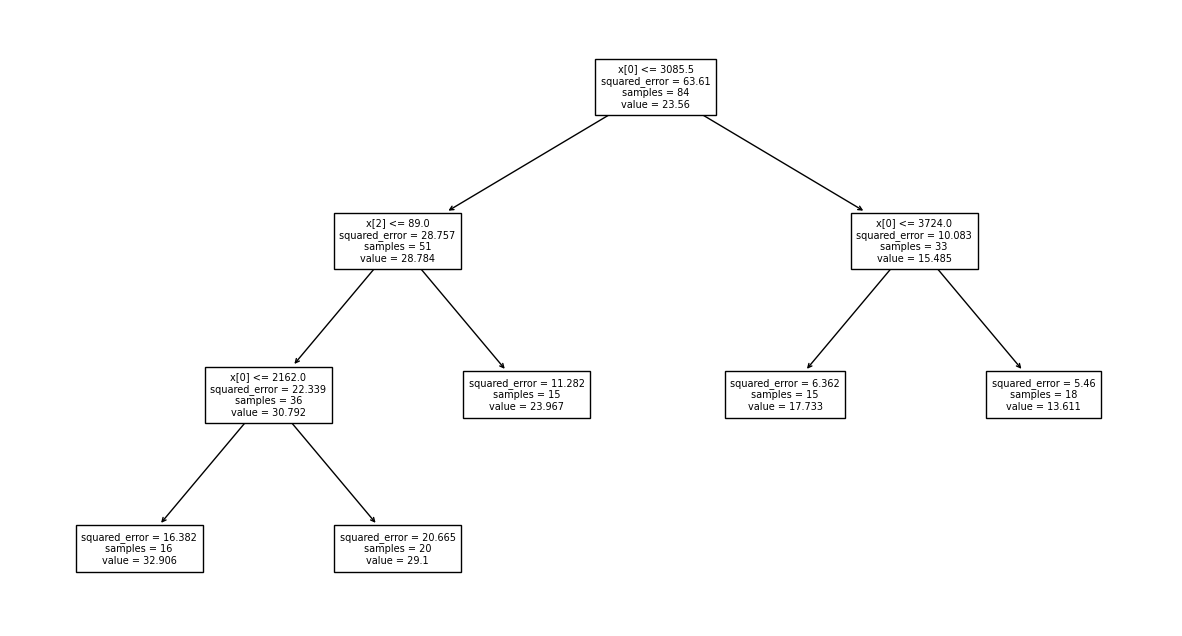

--------------------------------------------------------------------
Error Cuadrático Medio final (Decision Tree):  22.57266442539
Error Cuadrático Medio final (Random Forest):  20.78954387527778
--------------------------------------------------------------------


In [4]:
# Ejercicio 2: Dataset carsmall
print("----------------------------------------------")
print("Ejercicio 2: Dataset carsmall")
print("----------------------------------------------")

data = pd.read_csv("/home/carsmall.txt", header=None)

X = data.drop(columns=[3]).to_numpy()
Y = data[3].to_numpy()

calcularMSE(X, Y, 10, 15, True)

# Dataset TratamientoRegresion

----------------------------------------------
Ejercicio 3: Dataset TratamientoRegresion
----------------------------------------------
----------------------------------------------------
Resultados para Fold Nro. 1
----------------------------------------------------
Valor MSE (Decision Tree) =  1115.2777777777776
Valor MSE (Random Forest) =  372.4458333333334


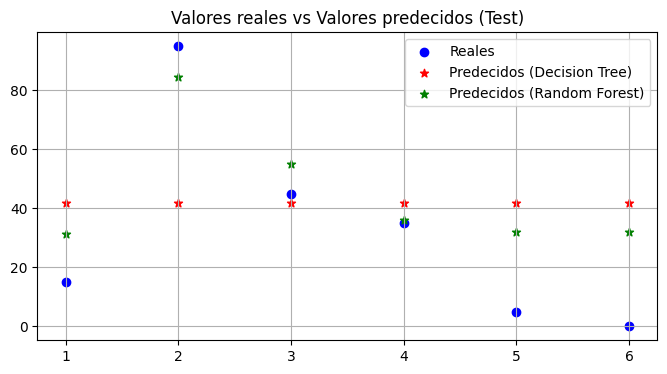

----------------------------------------------------
Resultados para Fold Nro. 2
----------------------------------------------------
Valor MSE (Decision Tree) =  1231.25
Valor MSE (Random Forest) =  486.2413541666668


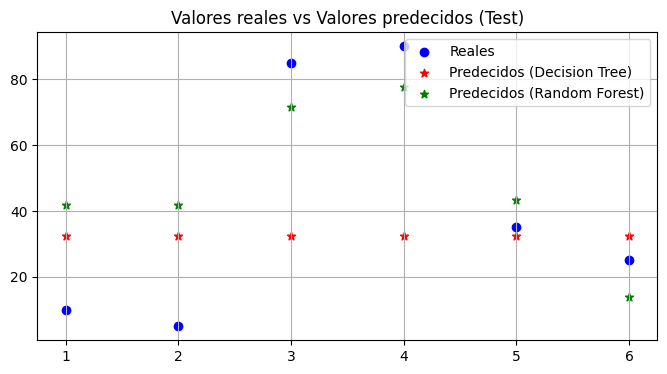

--------------------------------------------------------------------
Error Cuadrático Medio final (Decision Tree):  1173.2638888888887
Error Cuadrático Medio final (Random Forest):  429.3435937500001
--------------------------------------------------------------------


In [5]:
# Ejercicio 3: Dataset TratamientoRegresion
print("----------------------------------------------")
print("Ejercicio 3: Dataset TratamientoRegresion")
print("----------------------------------------------")

data = pd.read_excel("/home/TratamientoRegresion.xlsx", header=None)

X = data[3][5:].to_numpy().reshape(-1,1)
Y = data[4][5:].to_numpy()
calcularMSE(X, Y, 2, 10, False)

**Conclusión**


Se puede concluir que, de manera general, el método Random Forest ayudó a obtener mejores métricas en comparación con el árbol de regresión individual para los diferentes escenarios de regresión:

Para el caso del dataset Computer Hardware se obtuvo con un único árbol de decisión un MSE igual a  9.748,5057 mientras que con Random Forest se obtuvo un MSE igual a 2.208,9215.

Para el caso del dataset carsmall se obtuvo con un único arbol de decisión un MSE igual a 22,5727 y con Random Forest un MSE igual a 20,7895.

Finalmente, para el dataset TratamientoRegresion se obtuvo con un único árbol de regresión un MSE igual a 1.173,2639 mientras que con Random Forest el MSE obtenido fue de 429,3436.

Se puede concluir además que la mejora en la métrica obtenida se puede apreciar mucho mejor cuando se tienen varios datos para entrenamiento.